In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score
pd.options.display.float_format = "{:,.2f}".format
import sys
sys.path.append("../")
from src import soporte_ajuste as sa

In [2]:
# Para no tener que reiniciar el kernel
%load_ext autoreload
%autoreload 2

In [3]:
# Configuración warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Instrucción para visualizar todas las columnas de un dataFrame
pd.set_option('display.max_columns', None)

Ene este notebook haremos un modelo de prediccion para la variable profit con algoritmos de regresión, pero a diferencia de los del notebook anterior aquí lo hacemos sobre todo el dataframe, sin división de clusters.

In [ ]:
df_orig = pd.read_csv('../datos/Global_Superstore.csv', encoding='latin-1')
df_orig.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,"10,024.00",US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,"2,309.65",7,0.00,762.18,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","3,709.39",9,0.10,-288.76,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID","5,175.17",9,0.10,919.97,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless","2,892.51",5,0.10,-96.54,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed","2,832.96",8,0.00,311.52,903.04,Critical


In [ ]:
df = pd.read_csv('../datos/Global_Superstore_clustering.csv', encoding='latin-1', index_col=0)
df.head()



,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,clusters_dbscan
0,0.00,0.00,0.00,0.05,0.00,0.52,0.02,0.02,0.19,0.19,0.06,0.00,0.20,0.06,0.00,4.23,1.55,-0.67,4.21,15.83,0.08,-1
1,0.00,0.00,0.00,0.20,0.00,0.30,0.00,0.02,0.06,0.21,0.07,0.00,0.19,0.07,0.00,7.10,2.42,-0.20,-1.82,15.66,0.08,-1
2,0.00,0.00,0.00,0.15,0.00,0.52,0.00,0.01,0.06,0.21,0.07,0.00,0.20,0.07,0.00,10.11,2.42,-0.20,5.11,15.52,0.57,-1
3,0.00,0.00,0.00,0.15,0.00,0.18,0.00,0.00,0.04,0.19,0.22,0.00,0.20,0.07,0.00,5.43,0.67,-0.20,-0.72,15.42,0.57,-1
4,0.00,0.00,0.00,0.05,0.00,0.52,0.00,0.00,0.00,0.09,0.09,0.00,0.20,0.04,0.00,5.30,1.99,-0.67,1.62,15.30,0.08,-1


In [7]:
df["Profit_vr"] = df_orig["Profit"]

In [8]:
df.drop(columns=["Profit"], inplace=True)

In [9]:
df = df.drop(columns=["clusters_dbscan"])
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Segment', 'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Shipping Cost', 'Order Priority', 'Profit_vr'],
      dtype='object')

In [10]:
df = df.drop(columns=['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Product ID'])
     
df.columns

Index(['Segment', 'City', 'State', 'Country', 'Market', 'Region', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Shipping Cost', 'Order Priority', 'Profit_vr'],
      dtype='object')

### Decision Tree

In [11]:
# instanciamos la clase de regresión lineal
analisis = sa.AnalisisModelosRegresion(dataframe=df, variable_dependiente='Profit_vr')

params_arbol = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [10, 50, 100, 200],
    'min_samples_leaf': [10, 50, 100, 200],
    'max_leaf_nodes': [4, 6, 8, 10, 20, 30]
}

# llamamos a la función para ajustar el modelo
analisis.ajustar_modelo(modelo='tree', param_grid=params_arbol)

In [12]:
# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados = analisis.obtener_resultados()
df_resultados.sample(10)

,Real,Predicho,Conjunto,Modelo,Residuos
15386,40.20,13.53,Train,tree,26.67
41161,4.20,13.53,Train,tree,-9.33
48138,4.14,13.53,Train,tree,-9.39
32388,15.10,13.53,Train,tree,1.57
45235,5.10,13.53,Train,tree,-8.43
39223,2.70,13.53,Train,tree,-10.83
44663,-6.01,-19.21,Train,tree,13.20
25858,34.56,13.53,Train,tree,21.03
11754,88.74,69.16,Train,tree,19.58
24246,-19.57,-53.47,Train,tree,33.89


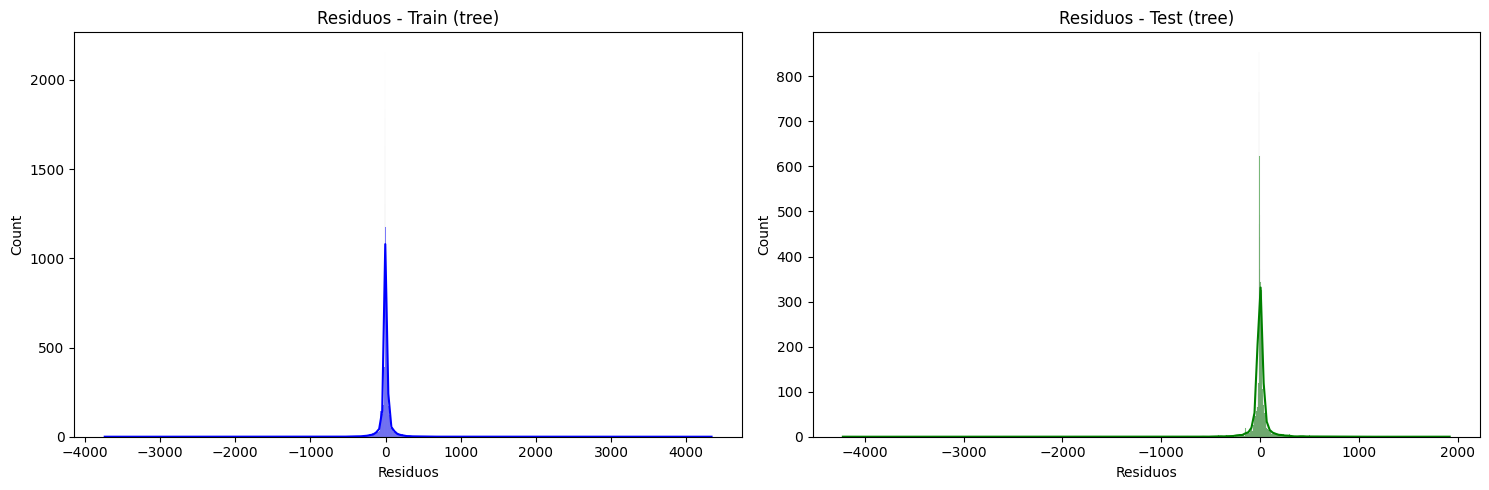

In [13]:
analisis.plot_residuos("tree")

In [14]:

analisis.calcular_metricas("tree")

,train,test
R2,0.72,0.61
MAE,38.78,41.24
MSE,"8,691.46","11,622.97"
RMSE,93.23,107.81


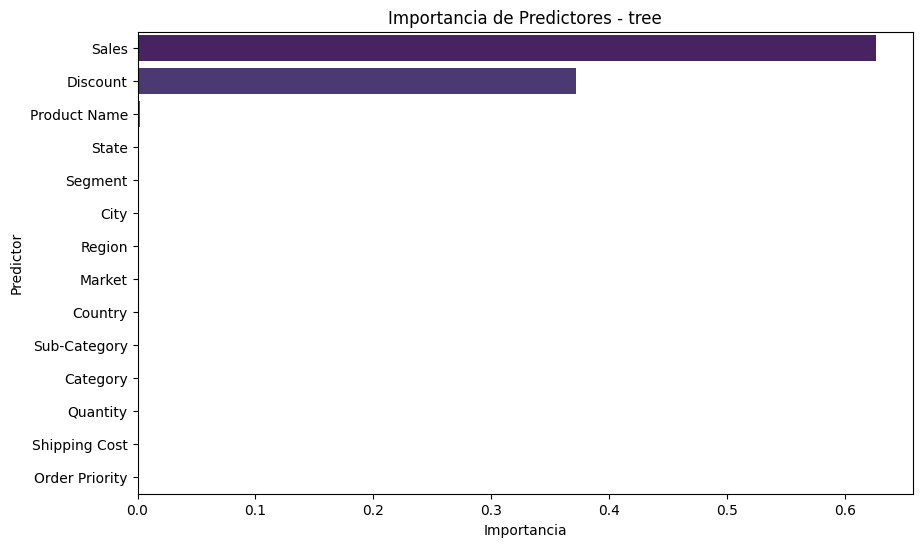

,Predictor,Importancia
9,Sales,0.63
11,Discount,0.37
8,Product Name,0.00
2,State,0.00
0,Segment,0.00
1,City,0.00
5,Region,0.00
4,Market,0.00
3,Country,0.00
7,Sub-Category,0.00


In [15]:
analisis.importancia_predictores("tree")

### Random Forest

In [16]:
# instanciamos la clase de regresión lineal
analisis_random_forest = sa.AnalisisModelosRegresion(dataframe=df, variable_dependiente='Profit_vr')

params_rf = {
    'n_estimators': [100],
    'max_depth': [5],
    'min_samples_split': [10],
    'min_samples_leaf': [1], 
    'max_leaf_nodes': [30]
}

# llamamos a la función para ajustar el modelo
analisis_random_forest.ajustar_modelo(modelo='random_forest', param_grid=params_rf)

In [17]:
# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_analisis_random_forest = analisis_random_forest.obtener_resultados()
df_resultados_analisis_random_forest.head(3)

,Real,Predicho,Conjunto,Modelo,Residuos
2558,-472.57,-379.95,Train,random_forest,-92.62
15041,109.89,67.55,Train,random_forest,42.34
38072,1.56,10.32,Train,random_forest,-8.76


In [18]:
analisis_random_forest.calcular_metricas("random_forest")

,train,test
R2,0.75,0.60
MAE,37.16,39.94
MSE,"7,776.53","11,861.22"
RMSE,88.18,108.91


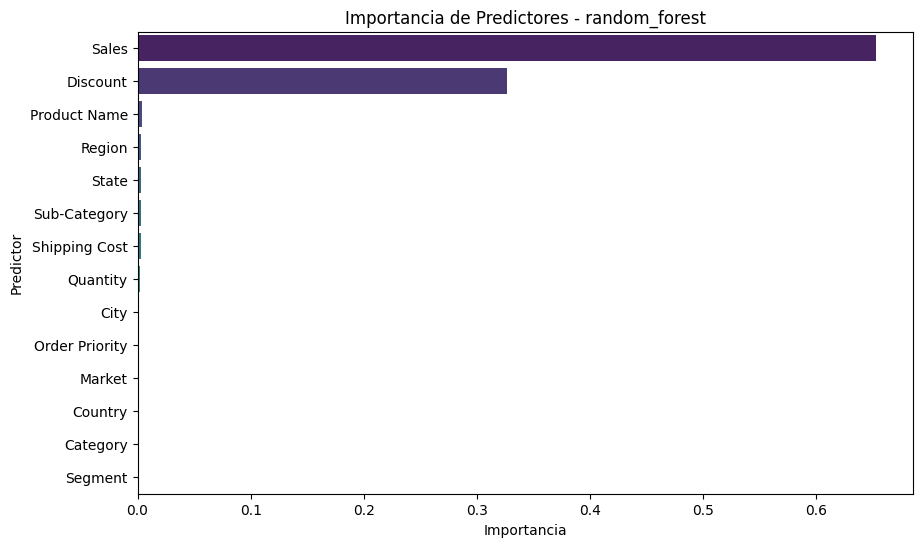

,Predictor,Importancia
9,Sales,0.65
11,Discount,0.33
8,Product Name,0.00
5,Region,0.00
2,State,0.00
7,Sub-Category,0.00
12,Shipping Cost,0.00
10,Quantity,0.00
1,City,0.00
13,Order Priority,0.00


In [19]:
analisis_random_forest.importancia_predictores("random_forest")


### Gradient Boost

In [20]:
# instanciamos la clase de regresión lineal
analisis_gradient_boosting = sa.AnalisisModelosRegresion(dataframe=df, variable_dependiente='Profit_vr')

params_gb = {
    'n_estimators': [50],
    'learning_rate': [0.01],
    'max_depth': [3],
    'min_samples_split': [2],
    'min_samples_leaf': [1,]
}

# llamamos a la función para ajustar el modelo
analisis_gradient_boosting.ajustar_modelo(modelo='gradient_boosting',param_grid = params_gb)

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_gradient_boosting = analisis_gradient_boosting.obtener_resultados()
df_resultados_gradient_boosting.head()

,Real,Predicho,Conjunto,Modelo,Residuos
2558,-472.57,-132.58,Train,gradient_boosting,-339.99
15041,109.89,29.13,Train,gradient_boosting,80.76
38072,1.56,29.13,Train,gradient_boosting,-27.57
15694,113.16,29.13,Train,gradient_boosting,84.03
30044,33.36,29.13,Train,gradient_boosting,4.23


In [21]:
analisis_gradient_boosting.calcular_metricas("gradient_boosting")


,train,test
R2,0.36,0.32
MAE,54.41,55.19
MSE,"19,408.46","20,407.05"
RMSE,139.31,142.85


las métricas han empeorado con respecto a las anteriores.

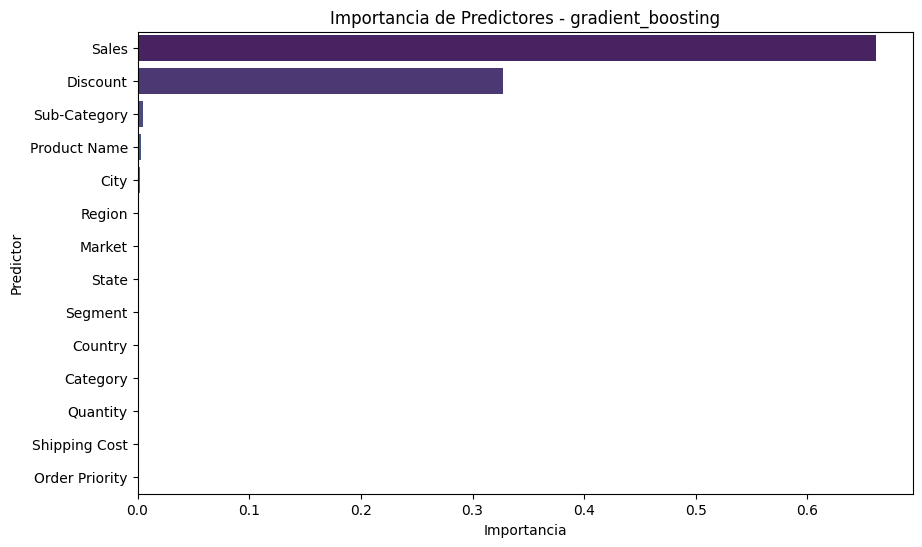

,Predictor,Importancia
9,Sales,0.66
11,Discount,0.33
7,Sub-Category,0.01
8,Product Name,0.00
1,City,0.00
5,Region,0.00
4,Market,0.00
2,State,0.00
0,Segment,0.00
3,Country,0.00


In [22]:
analisis_gradient_boosting.importancia_predictores("gradient_boosting")


### Xgboost

In [23]:
analisis_xgboost= sa.AnalisisModelosRegresion(dataframe=df, variable_dependiente='Profit_vr')
params_xgb = {
    'n_estimators': [50],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4],
    'min_child_weight': [1, 2],  
    'subsample': [0.8, 1.0],        
    'colsample_bytree': [0.8, 1.0]  
}

# llamamos a la función para ajustar el modelo
analisis_xgboost.ajustar_modelo(modelo='xgboost', param_grid=params_xgb)

In [24]:
# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_xgboost = analisis_xgboost.obtener_resultados()
df_resultados_xgboost.head()

,Real,Predicho,Conjunto,Modelo,Residuos
2558,-472.57,-392.11,Train,xgboost,-80.46
15041,109.89,65.34,Train,xgboost,44.55
38072,1.56,8.42,Train,xgboost,-6.86
15694,113.16,65.34,Train,xgboost,47.82
30044,33.36,20.80,Train,xgboost,12.56


In [25]:
analisis_xgboost.calcular_metricas("xgboost")

,train,test
R2,0.76,0.67
MAE,34.66,36.86
MSE,"7,319.44","9,724.75"
RMSE,85.55,98.61


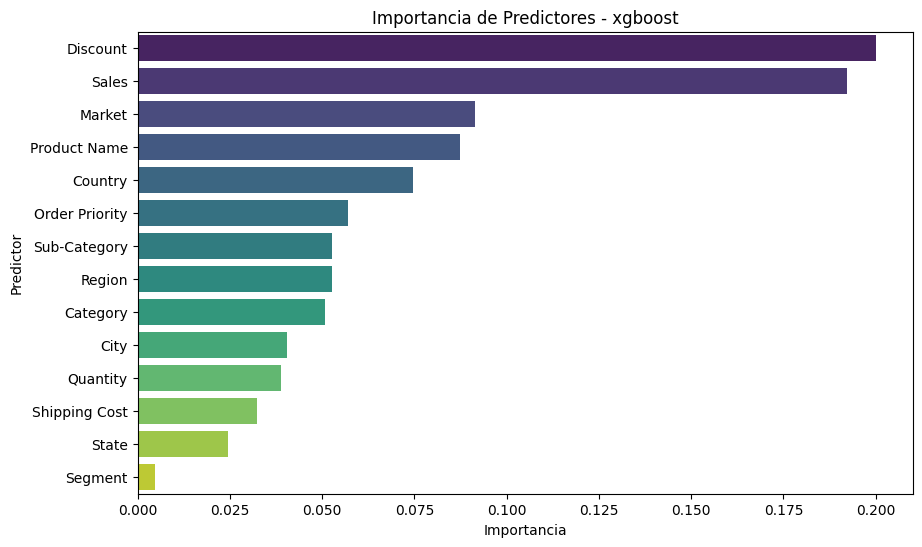

,Predictor,Importancia
11,Discount,0.20
9,Sales,0.19
4,Market,0.09
8,Product Name,0.09
3,Country,0.07
13,Order Priority,0.06
7,Sub-Category,0.05
5,Region,0.05
6,Category,0.05
1,City,0.04


In [26]:
analisis_xgboost.importancia_predictores("xgboost")


Sacamos los estadisticos de la variable respuesta

In [27]:
df["Profit_vr"].describe() 

count   51,290.00
mean        28.61
std        174.34
min     -6,599.98
25%          0.00
50%          9.24
75%         36.81
max      8,399.98
Name: Profit_vr, dtype: float64

Las mejores metricas las tenemos en xgboost con un RMSE de 98. Si vemso la media de la variable respeusta de 28,61 la predicción parece muy mala, pero hay que obervar que el rango de la variable respuesta es altisima, de -65000 a 83999, y es std es bastante alto. Parece claro observando esto y la distribución de los cuartiels que hay muchos outliers en esa variable que afedtan a las metricas de la predicción. 

En ese sentido y apesar de que hemso visto de que loa clusters que hemos definido no son la panacea, el hacer alguna agrupación aydua, pues en dos de los tres clusters (uno de ellos el más numeroso con diferencia de modo qu en global teniamos la mayorái de los datos) obteníamos mejores predicciones que con el dataframe unido de modo que las predicciones serán mejores al menos para agrupaciones concretas de los datos.

En todo caso, igual que en los clusters, vemos que los descuentos y las ventas son los que mayor importancia tienen en la predicción del modelo. Así que serán las variables a ajsutar preferentemente para maximizar el beneficio.